In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification

In [5]:
# Dataset 3a: Moons (non-spherical)
X_moons, _ = make_moons(n_samples=600, noise=0.06, random_state=42)

# Dataset 3b: Circles (non-spherical)
X_circles, _ = make_circles(n_samples=600, noise=0.06, factor=0.5, random_state=42)

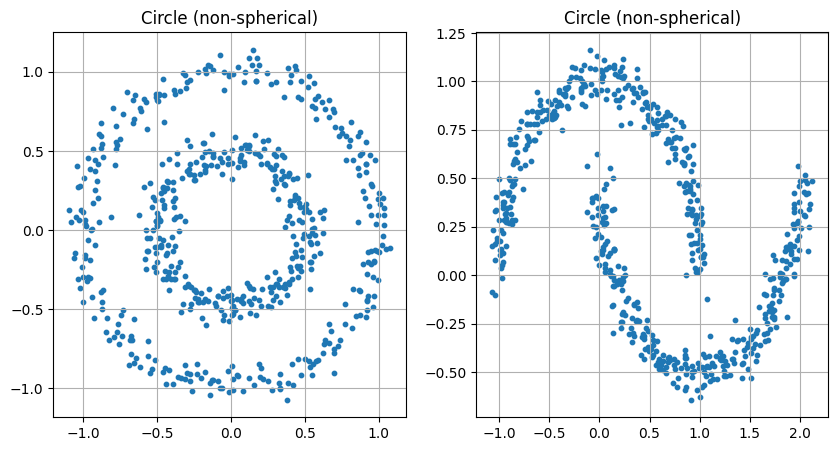

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X_circles[:,0], X_circles[:,1], s=10)
plt.title("Circle (non-spherical)")
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(X_moons[:,0], X_moons[:,1], s=10)
plt.title("Circle (non-spherical)")
plt.grid(True)

plt.show()



In [9]:
scaler = StandardScaler()
X_scaled_cir = scaler.fit_transform(X_circles)
X_scaled_moo =scaler.fit_transform(X_moons)

**DB scan for The circle**

In [17]:
dbscan_cir = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels_cir = dbscan_cir.fit_predict(X_scaled_cir)

**DBscan for moon**

In [16]:
dbscan_moo = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels_moon = dbscan_moo.fit_predict(X_scaled_moo)

**Analyze DBSCAN results**

0, 1 → clusters

-1 → noise

In [18]:
unique_labels_cir = np.unique(dbscan_labels_cir)
print("Cluster labels:", unique_labels_cir)

unique_labels_moon = np.unique(dbscan_labels_moon)
print("Cluster labels:", unique_labels_moon)

Cluster labels: [-1  0  1]
Cluster labels: [-1  0  1]


In [29]:
print("numbers of cluster with out the noise(-1) ")
n_clusters_cir = len(unique_labels_cir[unique_labels_cir != -1])
print("Number of clusters circle:", n_clusters_cir)

n_clusters_moon = len(unique_labels_moon[unique_labels_moon != -1])
print("Number of clusters for moon:", n_clusters_moon)

numbers of cluster with out the noise(-1) 
Number of clusters circle: 2
Number of clusters for moon: 2


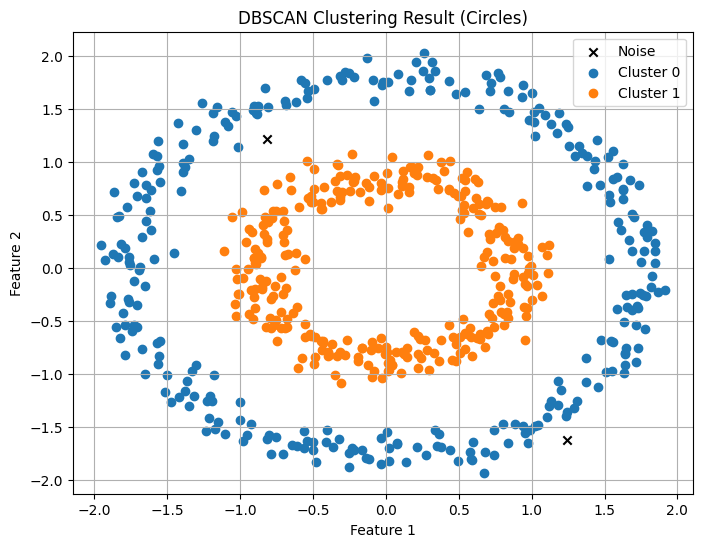

In [37]:
plt.figure(figsize=(8, 6))
for label in unique_labels_cir:
    if label == -1:
        # Noise points
        plt.scatter(
            X_scaled_cir[dbscan_labels_cir == label, 0],
            X_scaled_cir[dbscan_labels_cir == label, 1],
            c='black',
            marker='x',
            label='Noise'
        )
    else:
        # Cluster points
        plt.scatter(
            X_scaled_cir[dbscan_labels_cir == label, 0],
            X_scaled_cir[dbscan_labels_cir == label, 1],
            label=f'Cluster {label}'
        )

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering Result (Circles)')
plt.legend()
plt.grid(True)
plt.show()




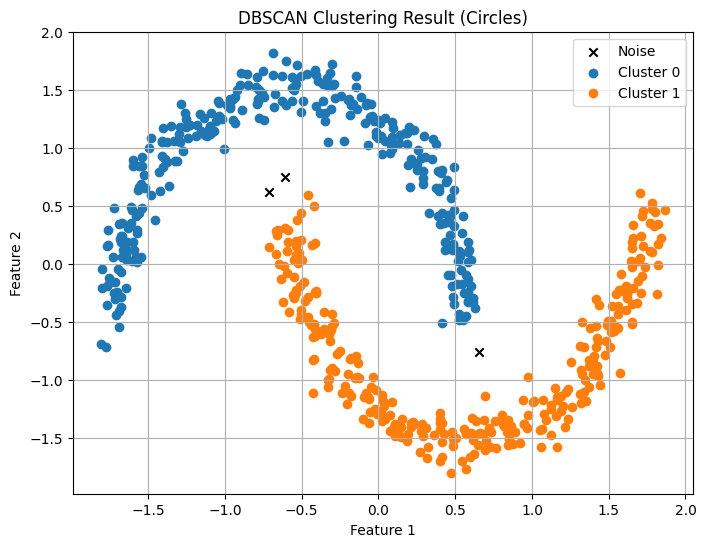

In [41]:
plt.figure(figsize=(8, 6))
for label in unique_labels_moon:
  if label ==-1:
    plt.scatter(
        X_scaled_moo[dbscan_labels_moon == label ,0],
        X_scaled_moo[dbscan_labels_moon== label, 1],
        c='black',
            marker='x',
            label='Noise')
  else:
    # Cluster points
    plt.scatter(
      X_scaled_moo[dbscan_labels_moon == label, 0],
      X_scaled_moo[dbscan_labels_moon == label, 1],
      label=f'Cluster {label}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering Result (Circles)')
plt.legend()
plt.grid(True)
plt.show()
